In [775]:
"""
ML: Pipeline

1. Understand question / problem
2. Load dataset
3. EDA
4. Prepocessing
5. Test / split data
6. Base Model
7. Evaluate
8. Improve model (Feature engineering, smote, etc)

Q: Can we predict whether a person is at risk of having a stroke based on health and demographic data?
"""

import pandas as pd

df = pd.read_csv("/Users/keryseverinodiaz/Desktop/GitHub/AI_ML_Roadmap/datasets/healthcare_dataset_stroke.csv")

df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [776]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [777]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [778]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Every column is full. No missing values besides BMI

Age, avg_glucose_level and bmi have a fluctuating std. Percentage Spread: std / mean = spread

In [779]:
age_spread = round((df['age'].std() / df['age'].mean()) * 100, 2)
print(f"Age spread: %{age_spread}")
avg_glucose_level_spread = round((df['avg_glucose_level'].std() / df['avg_glucose_level'].mean()) * 100, 2)
print(f"Avg glucose level spread:  %{avg_glucose_level_spread}")
bmi_spread = round((df['bmi'].std() / df['bmi'].mean()) * 100, 2)
print(f"BMI spread: %{bmi_spread}")

Age spread: %52.31
Avg glucose level spread:  %42.66
BMI spread: %27.18


In [780]:
bmi_na_sum = round((df['bmi'].isna().sum() / len(df)) * 100, 2)
print(f"BMI NaN: %{bmi_na_sum}")

BMI NaN: %3.93


Since our BMI NaN sum is less than %5 percent we can safely impute

In [781]:
# If the bmi column is not completely empty (after removing missing values), then it's safe to compute the median.
if not df['bmi'].dropna().empty:
    df['bmi'] = df['bmi'].fillna(df['bmi'].median())


In [782]:
df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [783]:
# Check target balance in percent
df['stroke'].value_counts(normalize=True) * 100

stroke
0    95.127202
1     4.872798
Name: proportion, dtype: float64

In [784]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


The data is severy imbalanced, we need to fix it with Smote, if not the model will predict mostly majority/dominant class which is 0

In [785]:
# Train / Split
from sklearn.model_selection import train_test_split

df.drop(columns=['id'], inplace=True)
X = df.drop('stroke', axis = 1)
y = df['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2, stratify=y)


# Encode data after splitting
X_train_encoded = pd.get_dummies(X_train, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, drop_first=True)
# Make sure same columns are in test and train
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

# Check imbalanced
print(y_train.value_counts())


stroke
0    3889
1     199
Name: count, dtype: int64


In [786]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [787]:
# Get SMOTE
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_train_encoded, y_train)

# Check imbalanced
from collections import Counter
print(Counter(y_resampled))

Counter({0: 3889, 1: 3889})


In [788]:
# Scaled data for LR
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_resampled_scaled = scaler.fit_transform(X_resampled)
X_test_scaled = scaler.transform(X_test_encoded)

In [789]:
# Train model on balanced data
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
lr.fit(X_resampled_scaled, y_resampled)

y_probs = lr.predict_proba(X_test_scaled)[:, 1]

# Set threshold
thresholds = [0.2, 0.25, 0.3, 0.35, 0.4]

# Evaluate Model
from sklearn.metrics import classification_report

for t in thresholds:
    y_pred_thresh = (y_probs >= t).astype(int)
    print(f"\n--- Threshold = {t} ---")
    print(classification_report(y_test, y_pred_thresh, digits=3))



--- Threshold = 0.2 ---
              precision    recall  f1-score   support

           0      0.979     0.708     0.821       972
           1      0.110     0.700     0.190        50

    accuracy                          0.707      1022
   macro avg      0.544     0.704     0.506      1022
weighted avg      0.936     0.707     0.791      1022


--- Threshold = 0.25 ---
              precision    recall  f1-score   support

           0      0.979     0.734     0.839       972
           1      0.119     0.700     0.203        50

    accuracy                          0.732      1022
   macro avg      0.549     0.717     0.521      1022
weighted avg      0.937     0.732     0.808      1022


--- Threshold = 0.3 ---
              precision    recall  f1-score   support

           0      0.979     0.761     0.856       972
           1      0.128     0.680     0.215        50

    accuracy                          0.757      1022
   macro avg      0.553     0.721     0.536      102

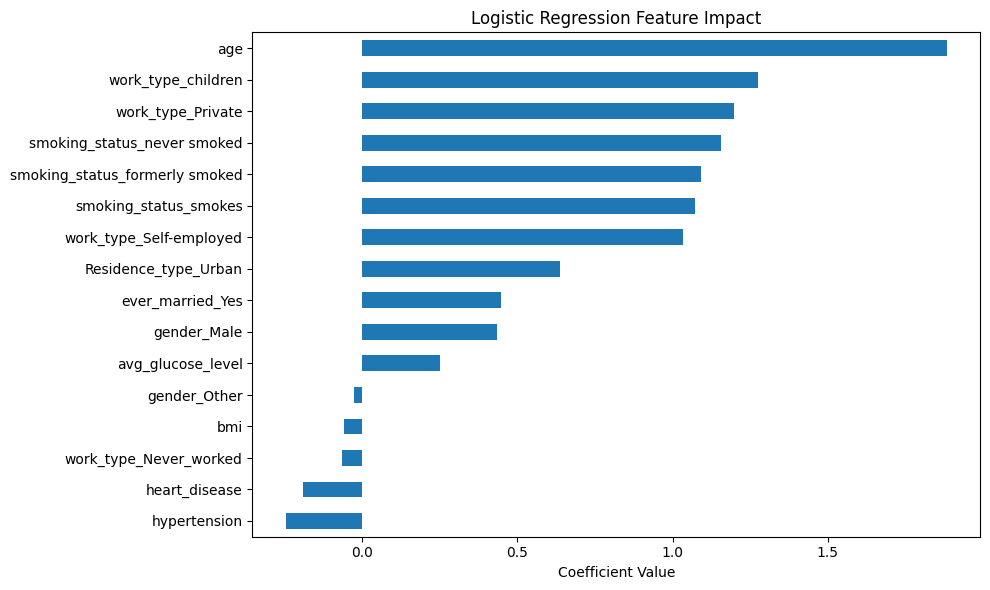

In [790]:
import matplotlib.pyplot as plt
coeffs = pd.Series(lr.coef_[0], index=X_train_encoded.columns)
coeffs = coeffs.sort_values()

# Plot
plt.figure(figsize=(10, 6))
coeffs.plot(kind='barh', title='Logistic Regression Feature Impact')
plt.xlabel('Coefficient Value')
plt.tight_layout()
plt.show()


Still not balanced between 0, 1 so we can try a more complex model

In [791]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42, class_weight='balanced')

rf.fit(X_resampled, y_resampled)

y_pred_rf = rf.predict(X_test_encoded)

print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       972
           1       0.16      0.16      0.16        50

    accuracy                           0.92      1022
   macro avg       0.56      0.56      0.56      1022
weighted avg       0.92      0.92      0.92      1022



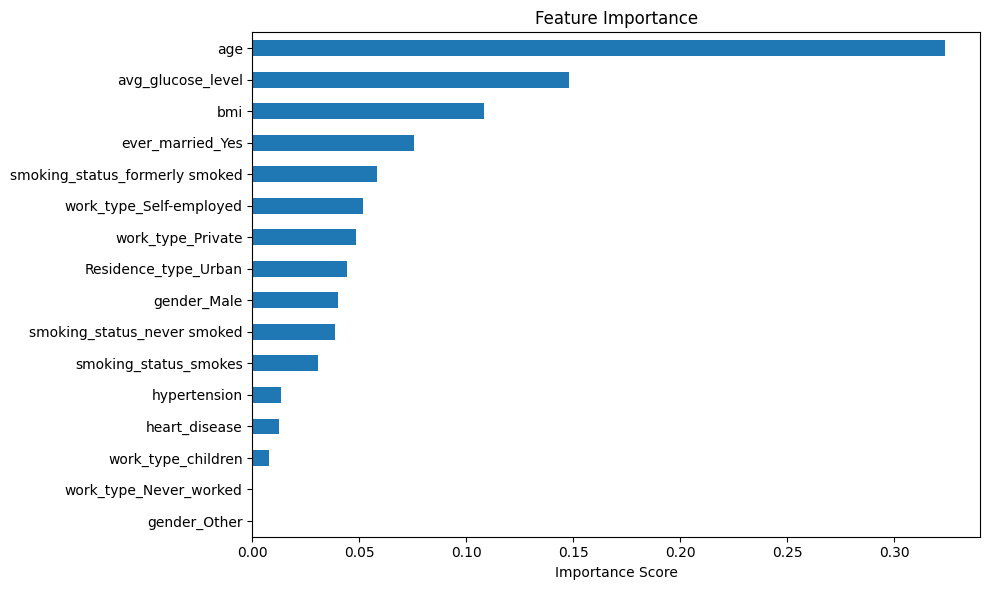

In [792]:
# Use the model you trained, e.g. rf or xgb
importances = pd.Series(rf.feature_importances_, index=X_train_encoded.columns)
importances = importances.sort_values(ascending=True)

# Plot
plt.figure(figsize=(0, 6))
importances.plot(kind='barh', title='Feature Importance')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()
